# **`Wildfire Severity Prediction `**

---



---






## Importing Libraries




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib


## `Data Collection & Preprocessing `


---





### Load Dataset and Read the CSV file

In [ ]:
df = pd.read_csv('/content/California_Fire_Incidents.csv')

### Display basic info

In [ ]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1636, 40)


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [ ]:
print(f"Length of the dataset: {len(df)}")

Length of the dataset: 1636


## `Data Cleaning & Feature Selection`

---



### Check for missing values

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
StructuresEvacuated,1636
FuelType,1624
Fatalities,1615
AirTankers,1608
StructuresThreatened,1606
StructuresDamaged,1569
Helicopters,1552
ControlStatement,1531
Injuries,1516
Dozers,1513


### Select only the useful columns

In [ ]:
selected_columns = [
    'AcresBurned', 'Counties', 'Latitude', 'Longitude',
    'PercentContained', 'PersonnelInvolved', 'Engines',
    'Helicopters', 'Dozers', 'WaterTenders', 'MajorIncident'
]

df = df[selected_columns]

### Handle missing values

In [ ]:
df.fillna(0, inplace=True)

### Display clean data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AcresBurned        1636 non-null   float64
 1   Counties           1636 non-null   object 
 2   Latitude           1636 non-null   float64
 3   Longitude          1636 non-null   float64
 4   PercentContained   1636 non-null   float64
 5   PersonnelInvolved  1636 non-null   float64
 6   Engines            1636 non-null   float64
 7   Helicopters        1636 non-null   float64
 8   Dozers             1636 non-null   float64
 9   WaterTenders       1636 non-null   float64
 10  MajorIncident      1636 non-null   bool   
dtypes: bool(1), float64(9), object(1)
memory usage: 129.5+ KB


##`Encode Categorical & Boolean Features`

---



### Encode Counties (categorical)

In [ ]:
le = LabelEncoder()
df['Counties'] = le.fit_transform(df['Counties'])

### Convert MajorIncident (boolean) to 0/1

In [ ]:
df['MajorIncident'] = df['MajorIncident'].astype(int)

### Confirm encoding

In [ ]:
df.head()

,AcresBurned,Counties,Latitude,Longitude,PercentContained,PersonnelInvolved,Engines,Helicopters,Dozers,WaterTenders,MajorIncident
0,257314.0,55,37.857000,-120.086000,100.0,0.0,0.0,0.0,0.0,0.0,0
1,30274.0,17,34.585595,-118.423176,100.0,0.0,0.0,0.0,0.0,0.0,0
2,27531.0,32,33.709500,-116.728850,100.0,0.0,0.0,0.0,0.0,0.0,0
3,27440.0,30,39.120000,-120.650000,100.0,0.0,0.0,0.0,0.0,0.0,0
4,24251.0,56,0.000000,0.000000,100.0,2167.0,117.0,11.0,8.0,11.0,1


## `Data Exploration (EDA)`

---



### Basic statistics

In [ ]:
print(df.describe())

         AcresBurned     Counties     Latitude    Longitude  PercentContained  \
count    1636.000000  1636.000000  1636.000000  1636.000000       1636.000000   
mean     4581.028117    28.516504    37.203975  -108.082642         99.816626   
std     27242.019296    15.889037   135.401380    37.006927          4.279600   
min         0.000000     0.000000  -120.258000  -124.196290          0.000000   
25%        35.000000    15.000000    34.165891  -121.768358        100.000000   
50%       100.000000    32.000000    37.104065  -120.461560        100.000000   
75%       420.500000    41.000000    39.086808  -117.474073        100.000000   
max    410203.000000    58.000000  5487.000000   118.908200        100.000000   

       PersonnelInvolved      Engines  Helicopters       Dozers  WaterTenders  \
count        1636.000000  1636.000000  1636.000000  1636.000000   1636.000000   
mean           40.968826     2.751222     0.275061     0.570293      0.697433   
std           213.328472   

### Correlation heatmap

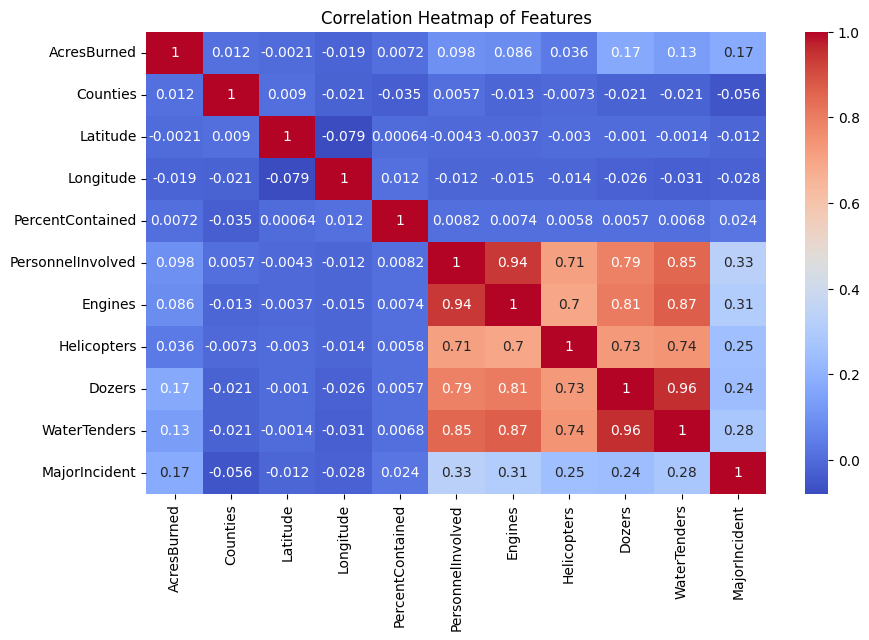

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

### Distribution of target variable

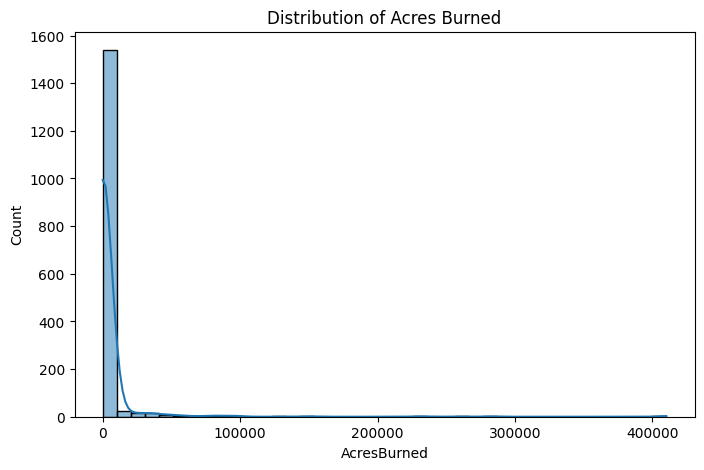

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['AcresBurned'], bins=40, kde=True)
plt.title("Distribution of Acres Burned")
plt.show()

### Check relation between AcresBurned and major incident

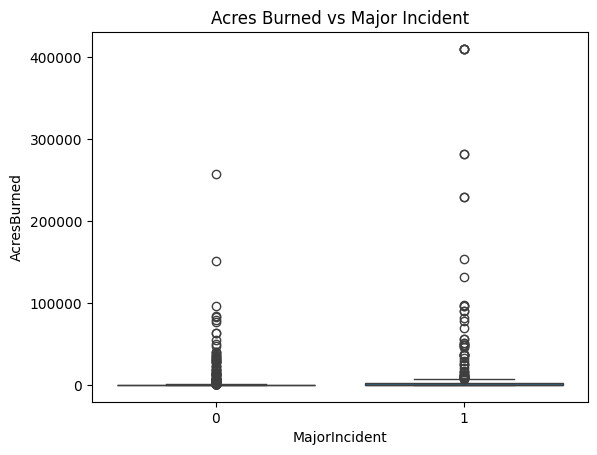

In [ ]:
sns.boxplot(x='MajorIncident', y='AcresBurned', data=df)
plt.title("Acres Burned vs Major Incident")
plt.show()


## `Split Data for Model Training`

---



### Define X (features) and y (target)

In [ ]:
X = df.drop('AcresBurned', axis=1)
y = df['AcresBurned']

### Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

Training Set: (1308, 10)
Testing Set: (328, 10)


### Scale numerical features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing Completed Successfully!")

Preprocessing Completed Successfully!


## `Model Training & Evaluation`

---



### Define models

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

### Train and evaluate all models

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"\n{name} Results:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R² Score: {r2:.3f}")


Linear Regression Results:
Mean Absolute Error: 7666.62
Root Mean Squared Error: 29167.91
R² Score: 0.025

Decision Tree Results:
Mean Absolute Error: 6114.70
Root Mean Squared Error: 21955.55
R² Score: 0.447

Random Forest Results:
Mean Absolute Error: 5340.67
Root Mean Squared Error: 18202.54
R² Score: 0.620

XGBoost Results:
Mean Absolute Error: 4934.82
Root Mean Squared Error: 13750.55
R² Score: 0.783


### Convert results to DataFrame for easy viewing

In [ ]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R2", ascending=False)
print("\n Model Comparison Table:")
display(results_df)


 Model Comparison Table:


,MAE,RMSE,R2
XGBoost,4934.823709,13750.549561,0.783227
Random Forest,5340.665187,18202.538739,0.620135
Decision Tree,6114.702337,21955.545428,0.447345
Linear Regression,7666.616472,29167.906956,0.024615


## `Visualizing Model Performance`

---





### Visualize model comparison

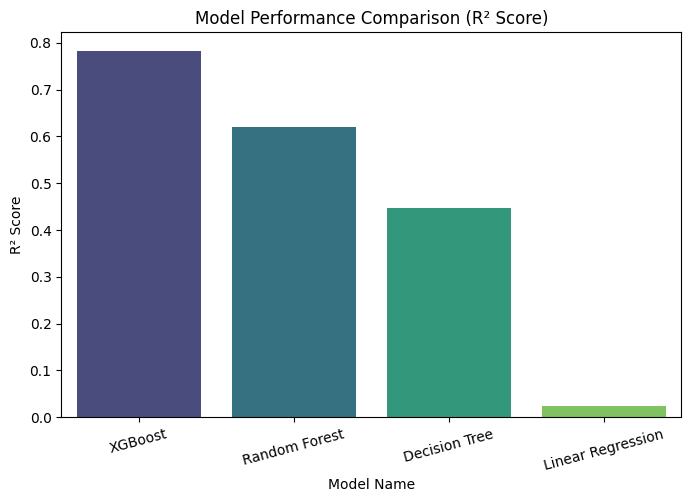

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis", hue=results_df.index, legend=False)
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Model Name")
plt.xticks(rotation=15)
plt.show()

## `Save the Best Model`

---



### Identify the best model

In [ ]:
best_model_name = results_df.index[0]
best_model = models[best_model_name]

### Save the model and scaler

In [ ]:
joblib.dump(best_model, "best_fire_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"Best Model Saved: {best_model_name}")

Best Model Saved: XGBoost


In [ ]:
from google.colab import files

# Download both files to your computer
files.download("best_fire_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `Model Evaluation & Visualization`

---



### Load saved best model and scaler

In [ ]:
best_model = joblib.load("best_fire_model.pkl")
scaler = joblib.load("scaler.pkl")

### Make predictions on test data

In [ ]:
y_pred = best_model.predict(X_test_scaled)

### Compute evaluation metrics

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Final Evaluation of Best Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

 Final Evaluation of Best Model:
Mean Absolute Error (MAE): 4934.82
Root Mean Squared Error (RMSE): 13750.55
R² Score: 0.783



## 1. Actual vs Predicted Values


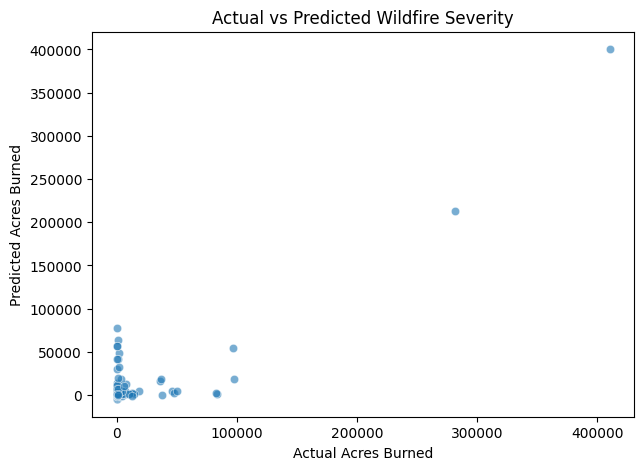

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Acres Burned")
plt.ylabel("Predicted Acres Burned")
plt.title("Actual vs Predicted Wildfire Severity")
plt.show()


## 2. Residual Analysis (Error Distribution)

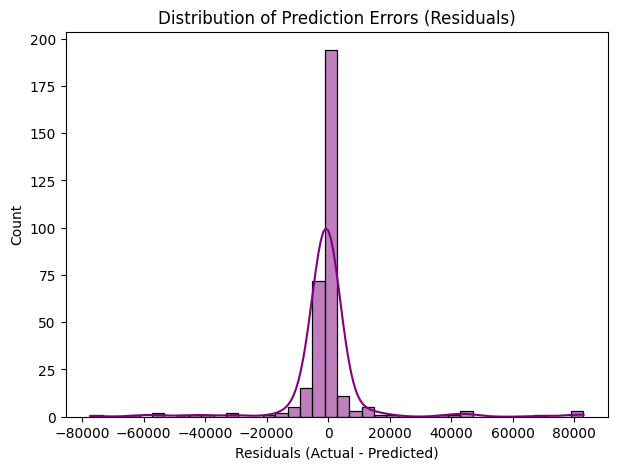

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=40, kde=True, color='purple')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

## 3. Feature Importance (for tree-based models)

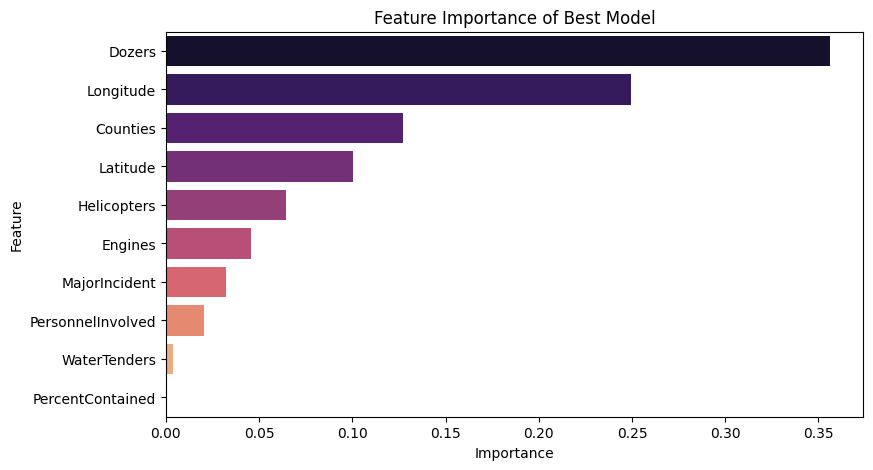

In [ ]:
try:
    feature_importances = best_model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(9,5))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma", hue="Feature", legend=False)
    plt.title("Feature Importance of Best Model")
    plt.show()
except:
    print(" Feature importance not available for this model type (e.g., Linear Regression).")

##  4. Performance Summary Table

In [ ]:
summary = pd.DataFrame({
    "Metric": ["Mean Absolute Error", "Root Mean Squared Error", "R² Score"],
    "Value": [mae, rmse, r2]
})

print("\n Model Performance Summary:")
display(summary)

print("\n Phase 3 Completed Successfully — Model Evaluation Done!")


 Model Performance Summary:


,Metric,Value
0,Mean Absolute Error,4934.823709
1,Root Mean Squared Error,13750.549561
2,R² Score,0.783227



 Phase 3 Completed Successfully — Model Evaluation Done!
